<a href="https://colab.research.google.com/github/chimaek/kaggle/blob/master/Bike_Sharing_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Sharing Demand (자전거 수요 예측)

## 목표  
### 각 피쳐(열 값)들을 활용하여 자전거 수요를 예측해보자!!!

## 진행 과정

** 1.   데이터 확인  **  
** 2.   데이터 시각화 **  
** 3.   피쳐 엔지니어링 **  
** 4.   모델 설계 **  
** 5.   모델 평가 **  



## 1. 데이터 확인

In [0]:
import pandas as pd # 데이터셋의 형태를 보여주는 라이브러리

import numpy as np  # 행렬 연산을 도와주는 라이브러리

train = pd.read_csv('train.csv') # 학습용 데이터 

test = pd.read_csv('test.csv') # 테스트용 데이터

import warnings

warnings.filterwarnings('ignore') #오류무시

In [2]:
train_c = train.copy() # 학습용 데이터 복제

test_c = test.copy() # 테스트용 데이터 복제

train_c.head() # 학습용 데이터 위에서부터 있는 값을 보여줌.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**datatime = 시간별 날짜 + 타임 스탬프 <br>
season- 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울 <br>
holiday - 휴일로 간주되는지 여부<br>
workingday - 주말이나 휴일이 아닌지 여부<br>weather - 1 : 맑음, 흐림 흐림, 부분 흐림, 부분 흐림<br>
2 : 안개 + 흐림, 안개 + 깨진 구름, 안개 + 약간 구름, 안개<br>
3 : 밝은 눈, 밝은 비 + 뇌우 + 흩어져있는 구름, 밝은 비 + 흩어져있는 구름<br>
4 : 폭우 + 얼음 팔레트 + 뇌우 + 안개, 눈 + 안개<br>temp - 섭씨 온도<br>
atemp - "체감"섭씨<br>
humidity - 상대 습도<br>
windspeed - 풍속<br>
casual - 등록되지 않은 사용자 임대가 시작된 수<br>
registered - 시작된 등록 된 사용자 대여 수<br>
count - 총 임대 수**

In [3]:
train_c.shape

(10886, 12)

** 학습용 데이터에는 10886개의 데이터들이 존재하고 각 데이터들은 12개의 열(Feature)을 가지고있다. **

In [4]:
train_c.info() # 데이터들이 가지고있는 열 값의 간략한 형태를 보여줌.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


** 알 수 있는것 : 모든 열들은 숫자 값을 가지고 있다.  **

** 전형적인 선형회귀 문제 **

In [5]:
train_c.isnull().sum() # 각 데이터들의  열 값들중 비어있는 값이 있는지 표시

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

** 데이터 분석을 통한 결과 : 데이터들의 각 열 값은 숫자로 되어있으며 비어있는 값이 없다. **

## 2. 데이터 시각화

In [0]:
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리

import seaborn as sns # 데이터시각화 라이브러리


In [7]:
train_c.describe() # 변수들의 분포를 볼 수있는 함수

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## 0~4와 같은 한정된 값을 분석함.

### Season 분석

In [8]:
train_c.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

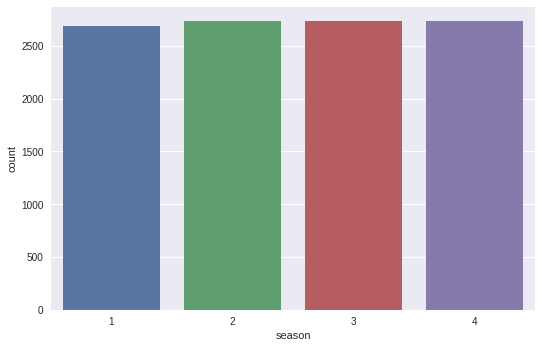

In [9]:
sns.factorplot(x ='season',data = train_c,kind = 'count',size=5,aspect=1.5)

** 데이터 중 2686개는 봄<br>2733개는 여름<br>2733개는 가을<br> 2734는 겨울 **

### holiday분석

In [10]:
train_c.holiday.value_counts()


0    10575
1      311
Name: holiday, dtype: int64

** 대부분의 데이터들은 휴일이 아닌날을 기준으로 하는것을 알 수 있음 ** 

### workingday 분석

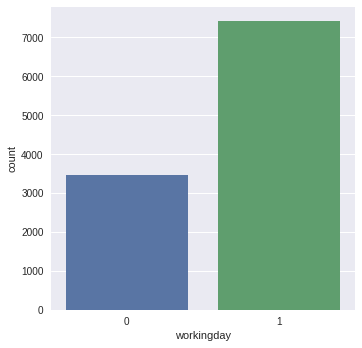

In [11]:
sns.factorplot(x='workingday',data=train_c,kind='count',size=5,aspect=1)

** 대부분의 데이터들은 근무일 기준이라는것을 알 수 있음 **

### weather 분석

In [12]:
train_c.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

## 숫자형 데이터 분석

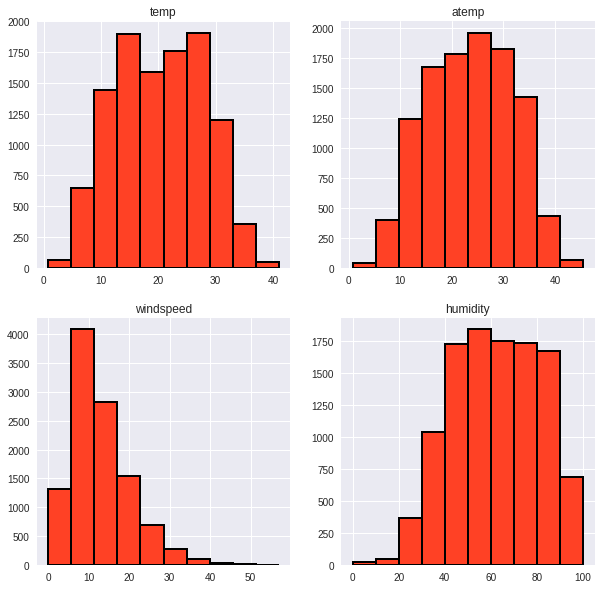

In [13]:
train_c.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=train_c,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("temp")
axes[0,1].hist(x="atemp",data=train_c,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("atemp")
axes[1,0].hist(x="windspeed",data=train_c,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("windspeed")
axes[1,1].hist(x="humidity",data=train_c,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,1].set_title("humidity")
fig.set_size_inches(10,10)

### 상관관계 분석

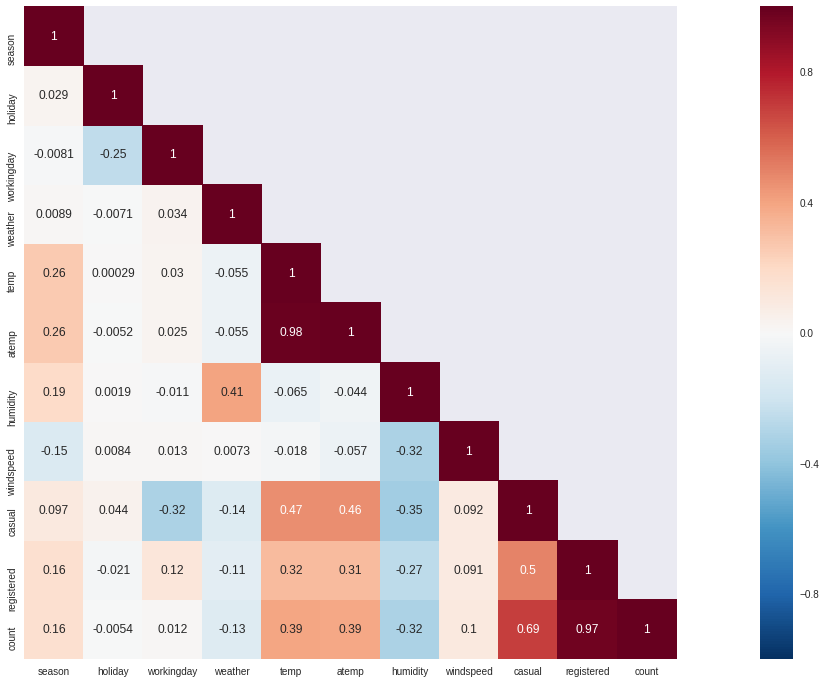

In [14]:
cor= train_c[:].corr()
n = np.array(cor)
n[np.tril_indices_from(n)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor,mask=n,square=True,annot=True,cbar=True)

** 상관관계 분석을 통해 알수 있는 사실**

1. 자기 자신에 대한 상관관계는 1이다.<br>
2. 온도와 체감온도는 매우 밀접한 관계가 있다.<br>
3. 날씨와 수는 날씨가 1에서 4로 증가함에 따라 날씨가 더 나빠지는것이므로 더 적은 사람들이 자전거를 빌릴것이라는것을 알 수 있다.<br>
4. casual과 Registered는 count와 매우 높은 관련성을 가진다. 따라서 대여된 자전거의 대부분이 등록되었다는것을 알 수 있다. 

## 3. 데이터 가공(Feature Engineering)

In [15]:
season = pd.get_dummies(train_c['season'],prefix='season')
train_c = pd.concat([train_c,season],axis=1)
train_c.head()
season = pd.get_dummies(test_c['season'],prefix='season')
test_c=pd.concat([test_c,season],axis=1)
test_c.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0


** 시즌 (1~4) 를 구간별로 나눈다. **

In [16]:
weather = pd.get_dummies(train_c['weather'],prefix='weather')
train_c = pd.concat([train_c,weather],axis=1)
train_c.head()
weather = pd.get_dummies(test_c['weather'],prefix='weather')
test_c=pd.concat([test_c,weather],axis=1)
test_c.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


** 날씨도 마찬가지로 구간별로 나눈다 **

In [17]:
train_c.drop(['season','weather'],inplace=True,axis=1)
train_c.head()
test_c.drop(['season','weather'],inplace=True,axis=1)
test_c.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


** 데이터 분할을 해주었으니 필요없는 시즌과 날씨는 데이터프레임에서 삭제한다 **

In [18]:
train_c["hour"] = [t.hour for t in pd.DatetimeIndex(train_c.datetime)]
train_c["day"] = [t.dayofweek for t in pd.DatetimeIndex(train_c.datetime)]
train_c["month"] = [t.month for t in pd.DatetimeIndex(train_c.datetime)]
train_c['year'] = [t.year for t in pd.DatetimeIndex(train_c.datetime)]
train_c['year'] = train_c['year'].map({2011:0, 2012:1})
train_c.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,...,0,0,1,0,0,0,0,5,1,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,...,0,0,1,0,0,0,1,5,1,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,...,0,0,1,0,0,0,2,5,1,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,...,0,0,1,0,0,0,3,5,1,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,...,0,0,1,0,0,0,4,5,1,0


** 시간에 따라서 자전거 임대에 많은 영향을 끼친다는가정을 하고 datetime을 년, 월,일 시간 으로 나눈다 . **

In [19]:
test_c["hour"] = [t.hour for t in pd.DatetimeIndex(test_c.datetime)]
test_c["day"] = [t.dayofweek for t in pd.DatetimeIndex(test_c.datetime)]
test_c["month"] = [t.month for t in pd.DatetimeIndex(test_c.datetime)]
test_c['year'] = [t.year for t in pd.DatetimeIndex(test_c.datetime)]
test_c['year'] = test_c['year'].map({2011:0, 2012:1})
test_c.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0,0,3,1,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,1,3,1,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,2,3,1,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,3,3,1,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,4,3,1,0


** 테스트셋도 위와 같은 형태로 변환해준다. **

In [20]:
train_c.drop('datetime',axis=1,inplace=True)
train_c.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,3,13,16,1,...,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,8,32,40,1,...,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,5,27,32,1,...,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0,3,10,13,1,...,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0,0,1,1,1,...,0,0,1,0,0,0,4,5,1,0


** 필요없는 datetime 제거 **

#### hour분석

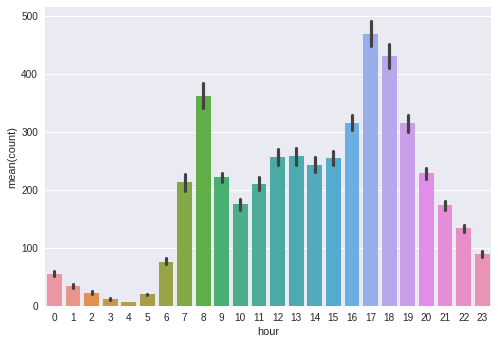

In [21]:
sns.barplot(x='hour',y='count',data=train_c)

** 알수 있는 사실: 8시 17,18시가 임대가 많았다. **

### month분석

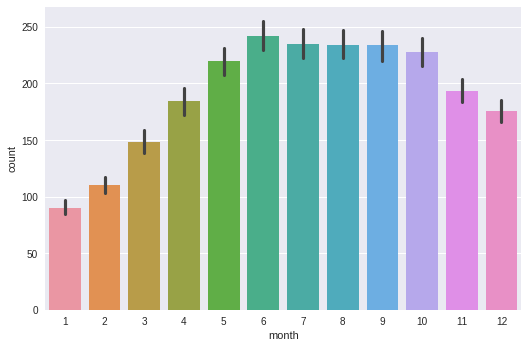

In [22]:
sns.factorplot(x="month",y="count",data=train_c,kind='bar',size=5,aspect=1.5)

** 6월 ~ 10월 까지 임대가 많았다. **

### year분석

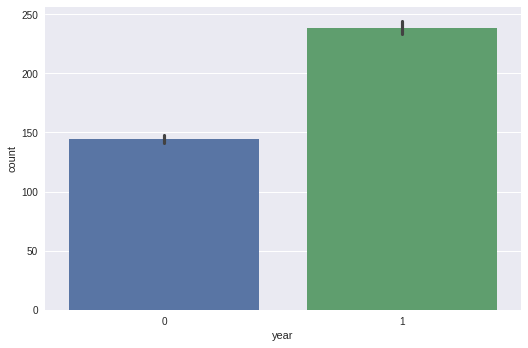

In [23]:
sns.factorplot(x="year",y="count",data=train_c,kind='bar',size=5,aspect=1.5)

** 위에서 2011년 데이터는 0으로 변경해주었고 2012년은 1로 변경해주었다. **
** 2012년이 임대수요가 많았다. **

### day분석

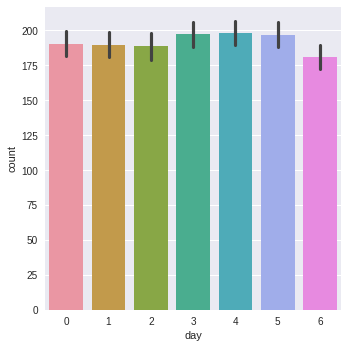

In [24]:
sns.factorplot(x="day",y='count',kind='bar',data=train_c,size=5,aspect=1)

** 월요일 ~ 일요일 까지 데이터들은 차이가 별로 없다는것을 알 수 있다. **

## 모델링

In [0]:
# 모델알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#모델 설계 도움되는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error

In [0]:
x_train,x_test,y_train,y_test=train_test_split(train_c.drop('count',axis=1),train_c['count'],test_size=0.25,random_state=42)

** 데이터셋을 분할 한다 학습용데이터에 예측해야할 count가 있으므로 제외한다.  학습용 데이터 75 테스트용 데이터 25로 분할함. **

In [0]:
models =[RandomForestRegressor(),SVR(),KNeighborsRegressor(),BaggingRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(),LogisticRegression()]

model_name = ['RandomForestRegressor','SVR','KNeighborsRegressor','BaggingRegressor','GradientBoostingRegressor','AdaBoostRegressor','LogisticRegression']
RMSLE =[]
d = {}
for model in range(len(models)):
  clf = models[model]
  clf.fit(x_train,y_train)
  predcit_test = clf.predict(x_test)
  RMSLE.append(np.sqrt(mean_squared_log_error(predcit_test,y_test)))

d = {'Model Algorithm':model_name,'RMSLE':RMSLE}


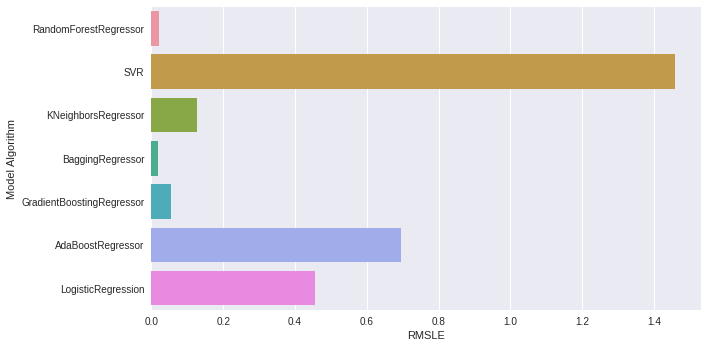

In [28]:

rmsle= pd.DataFrame(d)

sns.factorplot(y='Model Algorithm',x='RMSLE',data=rmsle,kind='bar',size=5,aspect=2)

** RMSLE **

과대평가 된 항목보다는 과소평가 된 항목에 페널티를 준다.

오차(Error)를 제곱(Square)해서 평균(Mean)한 값의 제곱근(Root)으로 값이 작을수록 정밀도가 높다.

0에 가까운 값이 나올수록 정밀도가 높은 값이다.

출처: 프로그래머스

** 즉 사용한 기법들중 랜덤포레스트기법이 정확도가 높다는것임. ** 